In [6]:
%matplotlib inline
import sys
sys.path.insert(0,'..')
from IPython.display import HTML,Image,SVG,YouTubeVideo
from helpers import header

HTML(header())

# Contour features

* what is an object
* what kind of features

## chain code algorithm

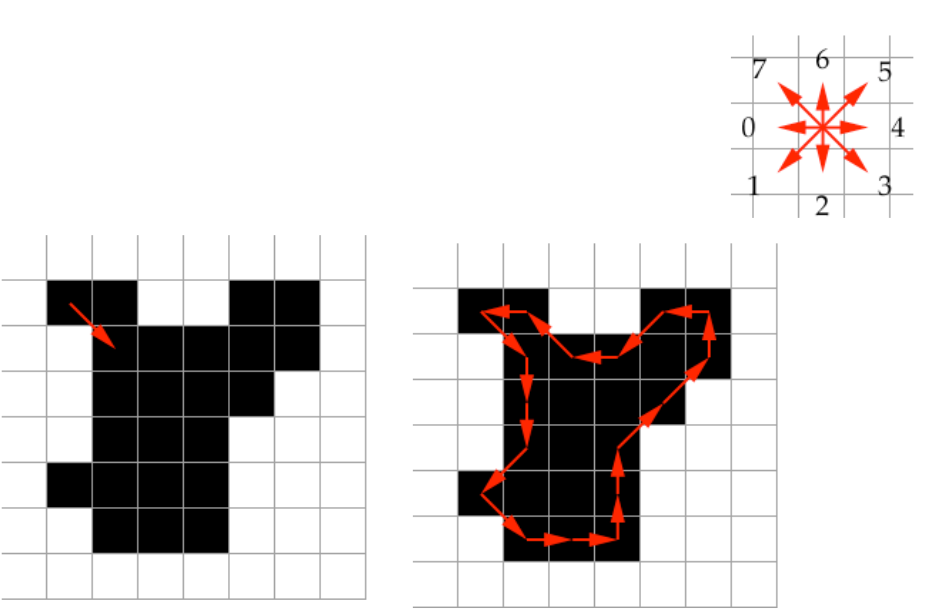

In [7]:
Image('http://homepages.ulb.ac.be/~odebeir/data/chain.png')

## polygonal approximation

## 2D shape descriptors (contours)

$$Formfactor = \frac {4 \pi Area}{Perimeter} $$

$$Convexity = \frac {Convex Perimeter}{Perimeter} $$

$$Eq.dia. =  \sqrt { \frac 4 \pi Area} $$

$$Solidity = \frac {Area}{Convex Area} $$

$$Aspect Ratio = \frac {Max\: diameter}{Min\: diameter} $$

eccentricity and principal direction
major and minor axis eigen values of $M$

$$
\begin{align}
S_x &=& \sum x_i\\
S_y &=& \sum y_i\\
S_{xx} &=& \sum x^2_i\\
S_{yy} &=& \sum y^2_i\\
S_{xy} &=& \sum x_i y_i
\end{align}
$$

$$
\begin{align}
M_{xx} &=& S_{xx} - \frac{S^2_x}{Area}\\
M_{yy} &=& S_{yy} - \frac{S^2_y}{Area}\\
M_{xy} &=& S_{xy} - \frac{S_xS_y}{Area}\\
\end{align}
$$

$$\theta = \tan^{-1} \Bigg\{ \frac{M_{xx}-M_{yy} + \sqrt{(M_{xx}-M_{yy})^2+4 M^2_{xy}} }{2M_{xy}}\Bigg\}$$



* fourier analysis
* fractal analysis